In [ ]:
import numpy as np
import cv2

In [ ]:
def change_brightness(img, alpha, beta):
    img_new = np.asarray(alpha*img + beta, dtype=int)   # cast pixel values to int
    img_new[img_new>255] = 255
    img_new[img_new<0] = 0
    return np.array(img_new, dtype=np.uint8)

In [ ]:
image_eye_left_1 = cv2.imread("D:/User/ESP32_DOIT/scripts/kitchenrobot.jpg")
image_eye_left_2 = cv2.imread("D:/User/ESP32_DOIT/scripts/smilerobot.jpg")
image_eye_left_1 = cv2.resize(image_eye_left_1, [523,630])
image_eye_left_2 = cv2.resize(image_eye_left_2, [523,630])

print(image_eye_left_1.shape)
print(image_eye_left_2.shape)
# image_processed = change_brightness(image, 1, 35)
eyes = cv2.hconcat([image_eye_left_1, image_eye_left_2])

cv2.imshow("image", eyes)
cv2.imwrite("imagerobot.png", eyes)
cv2.waitKey(0)

In [ ]:
import os
import pandas as pd

path = 'D:/User/ESP32_DOIT/scripts/image_102.txt'
# read text file into pandas DataFrame
df = pd.read_csv(path, sep=" ", header=None)

# display DataFrame
print(df[0])
for i in range(len(df[0])):
    df[0][i] = 45
    

print(df[0])
df.to_csv(path, sep=' ', index=False, header=False)


In [ ]:
names = [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush' ]
names[32]

In [ ]:
import pandas as pd 
import numpy as np
box1 = [100,100,100,100]
box2 = [100,100,100,100]
state = [0,0,0,0]
df = pd.read_csv("D:/User/Bot_C/Res/scripts/control.csv")
if df.empty:
    print('DataFrame is empty!')
data_frame = []
# # data_frame.append(box1)
data_frame.append(box2)
data_frame.append(state)
data_frame = np.reshape(data_frame, (1,8))

# # df2 = pd.DataFrame(data_frame, columns=['x1', 'x2', 'x3', 'x4',
# #                                         'y1', 'y2', 'y3', 'y4',
# #                                         'q1', 'q2', 'q3', 'q4'])
df2 = pd.DataFrame(data_frame, columns=['c11', 'c12', 'c21', 'c22', 'q1', 'q2', 'q3', 'q4'])

# df2 = pd.concat([df,df2])
df2.to_csv("D:/User/Bot_C/Res/scripts/control.csv", index=False)

df2


In [ ]:
import torch.nn as nn
import tqdm
import torch
class ANN(nn.Module):
    def __init__(self):
        super().__init__()

        # self.relu1 = nn.ReLU(inplace=True)
        self.liner1 = nn.Linear(8,128)
        self.relu = nn.ReLU()
        self.liner2 = nn.Linear(128,8)
        self.liner3 = nn.Linear(8,4)

        # self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        out = self.relu(self.liner1(x))
        out = self.relu(self.liner2(out))
        out = self.relu(self.liner3(out))

        return out

In [ ]:
model = ANN()
tensor = torch.rand([1, 8])
model(torch.tensor([X[0]], dtype=torch.float32))
# 

# tensor


# Model ANN

In [9]:
from model_ANN import ANN
import torch.nn as nn
import tqdm
import torch
def study(model, X, y, optimizer, losses, device):
    model.train()
    train_loss = 0
    # counter = 0
    # print ("@@@ Start train model @@@")
    for i, data in enumerate(X):
        # counter += 1
        image, label = torch.tensor(data,dtype=torch.float32), torch.tensor(y[i],dtype=torch.float32)
        image = image.to(device)
        label =label.to(device)
        optimizer.zero_grad()
        label_pre = model(image)
        # print(label_pre.shape)
        loss = losses(label_pre, label)
        train_loss += loss.item()
        # print(train_loss)
        loss.backward()
        optimizer.step()
        # print(preds)
    epoch_loss = train_loss / len(X)

    return epoch_loss

In [10]:
def val(model, X, y, losses, device):
    val_loss = 0
    # counter = 0
    # print ("@@@ Start train model @@@")
    for i, data in enumerate(X):
        # counter += 1
        image, label = torch.tensor(data,dtype=torch.float32), torch.tensor(y[i],dtype=torch.float32)
        image = image.to(device)
        label =label.to(device)
        label_pre = model(image)
        # print(label_pre.shape)
        loss = losses(label_pre, label)
        val_loss += loss.item()
        # print(train_loss)
        # loss.backward()
        # print(preds)
    epoch_loss = val_loss / len(X)

    return epoch_loss

In [11]:
def create_batch_data(Train_X, Train_y, batch):
    X, y = [], []
    XX, yy = [], []
    j=0
    while j < len(Train_y):
        X.append(Train_X[j])
        y.append(Train_y[j])
        if (j+1)%batch==0:
            XX.append(X)
            yy.append(y)
            X, y = [], []
        j+=1
    return np.array(XX), np.array(yy)

In [12]:
L0 = 7.5
L1 = 8
L2 = 11.5
def donghocthuan(q):
    x = L1*np.cos(q[1])*np.cos(q[0]) + L2*np.cos(q[2]-q[1])*np.cos(q[0])
    y = L1*np.cos(q[1])*np.sin(q[0]) + L2*np.cos(q[2]-q[1])*np.sin(q[0])
    z = L1*np.sin(q[1]) - L2*np.sin(q[2]-q[1]) + L0
    return x, y, z, q[3]

In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:/User/DLBot/scripts/data/angles.csv")
# df.head()
data = np.array(df)
X = np.array(data[:,0:8], dtype=np.double)/400
y = np.array(data[:,8:12], dtype=np.double)*np.pi/180

len(X)
# 
print(X[0])
print(y[0])
print(donghocthuan(y[0]))


[0.79   0.2325 1.     0.835  0.7775 0.2425 0.9975 0.7575]
[1.50098316 0.76794487 1.27409035 0.29670597]
(1.103048309490806, 15.77432573905827, 7.481956330839102, 0.29670597283903605)


In [11]:
def center_box(box):
    x, y = box[0]+(box[2] - box[0])/2, box[1]+(box[3] - box[1])/2
    w, h = (box[2] - box[0]), (box[3] - box[1])
    return x, y, w, h

In [28]:
data_create = []
for idx, dta in enumerate(X):
    box_1, box_2 = dta[:4], dta[4:]
    # x, y, w, h = center_box(box_1)
    # print(x,y,w,h)
    # print(idx)
    data_frame = np.hstack(
                        [center_box(box_1), center_box(box_2), donghocthuan(y[idx])])
    data_create.append(data_frame)
# df = pd.read_csv("D:/User/DLBot/scripts/data/angles_pro.csv")
df2 = pd.DataFrame(data_create, columns=['x1','y1','w1','h1','x2','y2','w2','h2','a1','a2','a3','a4'])
# df2 = pd.concat([df, df2])
df2.to_csv(
    "D:/User/DLBot/scripts/data/angles_pro.csv", index=False)
data_create

[array([ 0.895     ,  0.53375   ,  0.21      ,  0.6025    ,  0.8875    ,
         0.5       ,  0.22      ,  0.515     ,  1.10304831, 15.77432574,
         7.48195633,  0.29670597]),
 array([ 0.275     ,  0.63125   ,  0.455     ,  0.3125    ,  0.71      ,
         0.5575    ,  0.34      ,  0.26      , -6.08057626, 15.04995437,
         4.7404696 ,  0.33161256]),
 array([ 0.45375   ,  0.64875   ,  0.4025    ,  0.2675    ,  0.795     ,
         0.58875   ,  0.34      ,  0.2275    , -3.71799684, 13.87575312,
         2.19474544,  0.29670597]),
 array([ 0.30375   ,  0.64625   ,  0.3525    ,  0.2425    ,  0.765     ,
         0.575     ,  0.295     ,  0.205     , -5.0079513 , 14.54414664,
         2.74921811,  0.31415927]),
 array([ 0.9375    ,  0.3025    ,  0.12      ,  0.425     ,  0.88875   ,
         0.2625    ,  0.2175    ,  0.49      ,  1.89004083, 15.39314731,
        10.03890431,  0.31415927]),
 array([ 0.5325    ,  0.3775    ,  0.34      ,  0.255     ,  0.92125   ,
         0.35    

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:/User/DLBot/scripts/data/angles.csv")
# df.head()
data = np.array(df)
X = np.array(data[:,0:8], dtype=np.double)
y = np.array(data[:,8:12], dtype=np.double)

X

array([[316.,  93., 400., ...,  97., 399., 303.],
       [ 19., 190., 201., ..., 171., 352., 275.],
       [101., 206., 262., ..., 190., 386., 281.],
       ...,
       [  4., 153., 186., ..., 147., 233., 255.],
       [  3., 153., 184., ..., 146., 234., 254.],
       [269., 140., 400., ..., 127., 400., 284.]])

In [29]:
from sklearn.model_selection import train_test_split
Train_X, Val_X, Train_y, Val_y = train_test_split(X, y, test_size=0.2)
X_train, y_train = create_batch_data(Train_X, Train_y, 64)
X_val, y_val = create_batch_data(Val_X, Val_y, 64)

X_train.shape
# y_train[1]
Val_X[:10]

array([[0.0025, 0.575 , 0.6325, 0.9975, 0.2525, 0.51  , 0.69  , 0.8   ],
       [0.0125, 0.575 , 0.675 , 1.    , 0.27  , 0.5175, 0.7075, 0.8175],
       [0.015 , 0.565 , 0.68  , 1.    , 0.265 , 0.505 , 0.71  , 0.8   ],
       [0.3125, 0.035 , 0.8575, 0.405 , 0.47  , 0.08  , 0.8975, 0.3775],
       [0.45  , 0.5425, 0.985 , 0.905 , 0.575 , 0.5025, 1.    , 0.8325],
       [0.0225, 0.3925, 0.4325, 0.65  , 0.5525, 0.3575, 0.8675, 0.575 ],
       [0.6525, 0.255 , 1.    , 0.5775, 0.735 , 0.22  , 1.    , 0.5525],
       [0.39  , 0.2675, 0.8225, 0.54  , 0.7075, 0.2275, 1.    , 0.5   ],
       [0.005 , 0.5675, 0.6925, 0.9975, 0.2775, 0.505 , 0.715 , 0.795 ],
       [0.    , 0.2525, 0.1775, 0.58  , 0.3075, 0.3075, 0.6125, 0.51  ]])

In [33]:
# from sklearn import svm
import torch.optim as optim

# df = pd.read_csv("D:/User/Bot_C/Res/scripts/data_control.csv")

# print(y)
PATH = "D:/User/DLBot/scripts/model/model_auto_armv2.pt"
learning_rate = 0.001
model = ANN()
model.load_state_dict(torch.load(PATH))

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
# Loss function.
# losses = nn.CrossEntropyLoss()
losses = nn.MSELoss()
loss_tr = []
loss_va = []

# evaluate a model using repeated k-fold cross-validation
for i in range(10000):
    train_loss = study(model, X_train,y_train, optimizer, losses, device)
    val_loss = val(model,X_val, y_val,losses, device)
    loss_tr.append(train_loss)
    loss_va.append(val_loss)

    if i%100==0:
        print('epoch: ',i, 'Train loss: ', train_loss)
        print('       ',i, 'Val loss: ', val_loss)

torch.save(model.state_dict(), PATH)


cpu
epoch:  0 Train loss:  0.025196768964330356
        0 Val loss:  0.026288535445928574
epoch:  100 Train loss:  0.02576303171614806
        100 Val loss:  0.027905676513910294
epoch:  200 Train loss:  0.025890874676406384
        200 Val loss:  0.026291020214557648
epoch:  300 Train loss:  0.026035565572480362
        300 Val loss:  0.027661219239234924
epoch:  400 Train loss:  0.026012985967099667
        400 Val loss:  0.030484935268759727
epoch:  500 Train loss:  0.026455460737148922
        500 Val loss:  0.028802378103137016
epoch:  600 Train loss:  0.02726788291086753
        600 Val loss:  0.026135379448533058
epoch:  700 Train loss:  0.02466438834865888
        700 Val loss:  0.02512258291244507
epoch:  800 Train loss:  0.024706013190249603
        800 Val loss:  0.02604382112622261
epoch:  900 Train loss:  0.025189219663540523
        900 Val loss:  0.029262272641062737
epoch:  1000 Train loss:  0.02464904636144638
        1000 Val loss:  0.02831994742155075
epoch:  1100 Tr

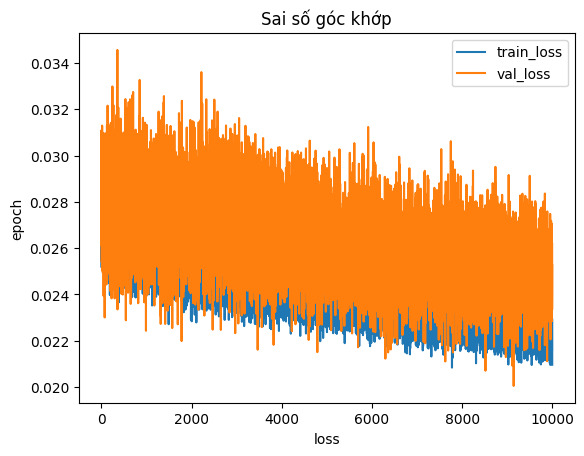

In [34]:
import matplotlib.pyplot as plt
# path = 'D:/User/DLBot/scripts/data/log.csv'
# df = pd.read_csv(path)

# df2 = pd.DataFrame(loss, columns=['loss'])
# df2 = pd.concat([df, df2])
# df2.to_csv(
#     path, index=False)
plt.title('Sai số góc khớp')
plt.xlabel('loss')
plt.ylabel('epoch')

plt.plot(loss_tr, label='train_loss')
plt.plot(loss_va, label='val_loss')
plt.legend()

plt.show()

In [104]:
torch.save(model.state_dict(), PATH)

In [35]:
the_model = ANN()
the_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [36]:
Val_X[:10]*400

array([[  1., 230., 253., 399., 101., 204., 276., 320.],
       [  5., 230., 270., 400., 108., 207., 283., 327.],
       [  6., 226., 272., 400., 106., 202., 284., 320.],
       [125.,  14., 343., 162., 188.,  32., 359., 151.],
       [180., 217., 394., 362., 230., 201., 400., 333.],
       [  9., 157., 173., 260., 221., 143., 347., 230.],
       [261., 102., 400., 231., 294.,  88., 400., 221.],
       [156., 107., 329., 216., 283.,  91., 400., 200.],
       [  2., 227., 277., 399., 111., 202., 286., 318.],
       [  0., 101.,  71., 232., 123., 123., 245., 204.]])

In [37]:
test_arr = torch.tensor([Val_X[:10]],dtype=torch.float32)
# print(Val_y[:5]*180/np.pi)
test_arr
# test_arr*400

tensor([[[0.0025, 0.5750, 0.6325, 0.9975, 0.2525, 0.5100, 0.6900, 0.8000],
         [0.0125, 0.5750, 0.6750, 1.0000, 0.2700, 0.5175, 0.7075, 0.8175],
         [0.0150, 0.5650, 0.6800, 1.0000, 0.2650, 0.5050, 0.7100, 0.8000],
         [0.3125, 0.0350, 0.8575, 0.4050, 0.4700, 0.0800, 0.8975, 0.3775],
         [0.4500, 0.5425, 0.9850, 0.9050, 0.5750, 0.5025, 1.0000, 0.8325],
         [0.0225, 0.3925, 0.4325, 0.6500, 0.5525, 0.3575, 0.8675, 0.5750],
         [0.6525, 0.2550, 1.0000, 0.5775, 0.7350, 0.2200, 1.0000, 0.5525],
         [0.3900, 0.2675, 0.8225, 0.5400, 0.7075, 0.2275, 1.0000, 0.5000],
         [0.0050, 0.5675, 0.6925, 0.9975, 0.2775, 0.5050, 0.7150, 0.7950],
         [0.0000, 0.2525, 0.1775, 0.5800, 0.3075, 0.3075, 0.6125, 0.5100]]])

In [38]:

output = the_model(test_arr)
ou = np.array(output.detach().numpy()[0]*180/np.pi,dtype=np.int8)
# len(str(ou[0]))
# np.array(output*180/np.pi, dtype=np.int8)
ou

array([[122,  43,  77,  20],
       [122,  43,  78,  20],
       [121,  44,  77,  20],
       [106,  74,  79,  21],
       [113,  41,  80,  20],
       [126,  38,  66,  20],
       [100,  55,  79,  20],
       [108,  50,  71,  20],
       [121,  44,  77,  20],
       [ 48,  19,  31,   7]], dtype=int8)

In [46]:
mm = Val_y[:10]*180/np.pi
# np.array(mm, dtype=np.uint8)
mm

array([[119.,  55.,  64.,  18.],
       [ 89.,  43.,  58.,  16.],
       [101.,  46.,  63.,  17.],
       [ 97.,  59.,  70.,  18.],
       [123.,  46.,  50.,  16.],
       [110.,  36.,  60.,  18.],
       [ 91.,  47.,  72.,  17.],
       [ 99.,  45.,  63.,  17.],
       [122.,  54.,  77.,  16.],
       [116.,  46.,  69.,  16.]])

In [ ]:
ou = np.array(output.detach().numpy()[0]*180/np.pi,dtype=np.int8)
ou

# -------------------------------------------------

In [ ]:
# from tracker.track import *
import cv2
# url1 = 'http://192.168.2.110/cam-lo.jpg'
frame = cv2.imread("D:/User/firmware/Screen/hinh-anh-mat-cuoi2-1.png")

speed = 0
def callback(data):
    global speed
    speed = data
cv2.namedWindow('test')
cv2.createTrackbar('thrs1', 'test', 0, 250, callback)


while True:
# try:
# cap = cv2.VideoCapture(url1)
    print(speed)
    cv2.imshow("image", frame)
    cv2.waitKey(1)
# Do whatever you want with contours
# cv2.imshow('test', frame)
# _, frame = cap.read()
# box, frame, area = tracking_sort(frame)
# idx = len(box[0])
# print(box[0][len(box[0])-1])
# print()

In [ ]:
def convert_map(angle, inmax, inmin, outmax, outmin):
    return (angle-inmin)*(outmax-outmin)/(inmax-inmin) + outmin

areas = 15000
different = 15000 - areas
speed = convert_map(different, 15000, 0, 255, 150)
print(speed)

In [ ]:
import pandas as pd
path_csv = "D:/User/Bot_C/Res/scripts/data/locals.csv"

idx_name = 2
# df = pd.read_csv(path_csv)
# data_create = [['imagel_1.png', 'imager_1.png', 'f']]
# df2 = pd.DataFrame(data_create, columns=['imagel', 'imager', 'action'])
name_l = "imagel_{}.png".format(idx_name)
name_r = "imager_{}.png".format(idx_name)
data_frame = []
data_out = 1
#  = control_keyboard(sv, key)
data_frame.append(name_l)
data_frame.append(name_r)
data_frame.append(data_out)
df2 = pd.DataFrame([data_frame], columns=['imagel', 'imager', 'action'])

# df2 = pd.DataFrame(data_create, columns=['c11', 'c12', 'c21', 'c22', 'q1', 'q2', 'q3', 'q4'])
# df2 = pd.concat([df, df2])
df2.to_csv(
    path_csv, index=False)

In [ ]:
import os
path_save_l = "D:/User/data_map/left/"
path_save_r = "D:/User/data_map/right/"
idx_name = len(os.listdir(path_save_l))

print(idx_name)

In [ ]:
import torch.optim as optim
# from model_CNN import Net
import torch.nn as nn
import pandas as pd
import numpy as np
import torch
import cv2
from sklearn import preprocessing

PATH = 'D:/User/DLBot/scripts/model/move_model.pt'
# net = Net()
# net.load_state_dict(torch.load(PATH))

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.5)


path_csv = "D:/User/DLBot/scripts/data/locals.csv"
path_save_l = "D:/User/data_map/left/"
path_save_r = "D:/User/data_map/right/"

df = pd.read_csv(path_csv)
Train_y = df['action']

# X = np.array(df['deceduti']).reshape(-1,1)
chuyenDoi = preprocessing.LabelEncoder()
chuyenDoi.fit(Train_y)
Train_y = chuyenDoi.transform(Train_y)


df = np.array(df)

Train_X = []
print(Train_y)
for data in df:
    row_data = []
    # print(data)
    image1 = cv2.imread(path_save_l+data[0])
    image2 = cv2.imread(path_save_r+data[1])
    
    row_data.append(image1)
    row_data.append(image2)
    
    Train_X.append(row_data)
    
print(np.array(Train_X).shape)

In [ ]:
from sklearn.model_selection import train_test_split
Train_X, Val_X, Train_y, Val_y = train_test_split(Train_X, Train_y, test_size=0.2)

In [ ]:
len(Train_X), len(Val_X)

In [ ]:
def create_batch_data(Train_X, Train_y, batch):
    X, y = [], []
    XX, yy = [], []
    j=0
    while j < len(Train_y):
        X.append(Train_X[j])
        y.append(Train_y[j])
        if (j+1)%batch==0:
            XX.append(X)
            yy.append(y)
            X, y = [], []
        j+=1
    return XX, yy

In [ ]:
tx, ty = create_batch_data(Train_X, Train_y, 32)
tx = np.array(tx,dtype=np.uint8)/255
ty = np.array(ty,dtype=np.uint8)
tx[:,:,0].shape

In [ ]:
import matplotlib.pyplot as plt
plt.hist(Train_y)
plt.title("Histogram")
plt.show()
plt.hist(Val_y)
plt.title("Histogram")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch, cv2
import torch.nn as nn

from model_CNN import Net
PATH_best = 'D:/User/DLBot/scripts/model/move_model_new_1.pt'

# model = Net()
# # model.to(device)
# model.load_state_dict(torch.load(PATH))

# error = nn.CrossEntropyLoss()

# learning_rate = 0.001
# # optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# num_epochs = 5
# count = 0
# # Lists for visualization of loss and accuracy 
# loss_list = []
# iteration_list = []
# accuracy_list = []

# # Lists for knowing classwise accuracy
# predictions_list = []
# labels_list = []
# predictions_list_train = []
# max = 0
# for epoch in range(num_epochs):
#     correct_train = 0
#     total_train = 0
#     for i, data in enumerate(Train_X):
#         # Transfering images and labels to GPU if available
#         # images, labels = images.to(device), labels.to(device)
#         image1 = cv2.resize(data[0], [255,255]).transpose([2,0,1])/255
#         image2 = cv2.resize(data[1], [255,255]).transpose([2,0,1])/255
#         inputs1, inputs2, labels = torch.tensor([image1],dtype=torch.float32), torch.tensor([image2],dtype=torch.float32), torch.tensor([Train_y[i]],dtype=torch.long)
        
#         # Forward pass 
#         outputs = model(inputs1, inputs2)
#         loss = error(outputs, labels)
#         predictions_train = torch.max(outputs, 1)[1]
#         predictions_list_train.append(predictions_train)
#         correct_train += (predictions_train == labels).sum()

#         total_train += len(labels)

#         accuracy_train = correct_train * 100 / total_train
#         # Initializing a gradient as 0 so there is no mixing of gradient among the batches
#         optimizer.zero_grad()
        
#         #Propagating the error backward
#         loss.backward()
        
#         # Optimizing the parameters
#         optimizer.step()
    
#         count += 1
#         # if not (count % 10):
#             # print("Iteration: {}, Loss: {}, Accuracy: {} %, Correct: {}".format(count, loss.data, accuracy_train, correct_train))
#     # Testing the model
    
#         if not (count % 10):    # It's same as "if count % 50 == 0"
#             total = 0
#             correct = 0
        
#             for j, valda in enumerate(Val_X):
#                 # images, labels = images.to(device), labels.to(device)
#                 # labels_list.append(labels)
            
#                 # test = Variable(images.view(100, 1, 28, 28))
#                 imagev1 = cv2.resize(valda[0], [255,255]).transpose([2,0,1])/255
#                 imagev2 = cv2.resize(valda[1], [255,255]).transpose([2,0,1])/255
#                 inputv1, inputv2, labels = torch.tensor([imagev1],dtype=torch.float32), torch.tensor([imagev2],dtype=torch.float32), torch.tensor([Val_y[j]],dtype=torch.long)

#                 outputs = model(inputv1, inputv2)
            
#                 predictions = torch.max(outputs, 1)[1]
#                 predictions_list.append(predictions)
#                 correct += (predictions == labels).sum()
            
#                 total += len(labels)
            
#             accuracy = correct * 100 / total
#             loss_list.append(loss.data)
#             iteration_list.append(count)
#             accuracy_list.append(accuracy)
#             if accuracy > max:
#                 max = accuracy 
#                 torch.save(model.state_dict(), PATH_best)
#         if not (count % 10):
#             print("Iteration: {}, Loss: {}, Accuracy: {} %, Train: {}".format(count, loss.data, accuracy, accuracy_train))
# torch.save(model.state_dict(), PATH)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.title("Histogram")
plt.show()
plt.plot(accuracy_list)
plt.title("Histogram")
plt.show()

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(Train_X):
        # get the inputs; data is a list of [inputs, labels]
        image1 = cv2.resize(data[0], [255,255]).transpose([2,0,1])/255
        image2 = cv2.resize(data[1], [255,255]).transpose([2,0,1])/255
        inputs1, inputs2, labels = torch.tensor([image1],dtype=torch.float32), torch.tensor([image2],dtype=torch.float32), torch.tensor([Train_y[i]],dtype=torch.long)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs1, inputs2)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # if i % 100 == 0:    # print every 2000 mini-batches
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss}')
    running_loss = 0.0

print('Finished Training')


torch.save(net.state_dict(), PATH)

In [ ]:
torch.save(model.state_dict(), PATH)


In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH_best, map_location='cpu'))
# Train_X[0][1]
out = []
for i in range (10):
    image1 = cv2.imread("D:/User/data_map_0/right/imager_3.png")
    image2 = cv2.imread("D:/User/data_map_0/left/imagel_3.png")
    image1 = cv2.resize(image1, [256,256]).transpose([2,0,1])/256
    image2 = cv2.resize(image2, [256,256]).transpose([2,0,1])/256
    image1, image2 = torch.tensor([image1],dtype=torch.float32), torch.tensor([image2],dtype=torch.float32)
    outputs = net(image1, image2)
    print(outputs)
    cost, predicted = torch.max(outputs, 1)
    print(cost)
    out.append(np.array(predicted, dtype=np.uint8)[0])
chuyenDoi.inverse_transform(np.array(out, dtype=np.uint8))

# out

# Processing data

In [ ]:
import pandas as pd
import os
import numpy as np
import cv2
# pathh = "C:/Users/Hero/Downloads/data_rubish/labels/Val/"

type_folder = ''

new_image_paths = "D:/User/data_objects/images/"+type_folder
new_label_paths = "D:/User/data_objects/labels/"+type_folder

old_image_paths = "D:/User/data_object/images/"+type_folder
old_label_paths= "D:/User/data_object/labels/"+type_folder
try:
  os.makedirs(new_image_paths)
  os.makedirs(new_label_paths)
except:
  pass
count = 551
lisdir = os.listdir(old_label_paths)

print(len(lisdir))
for filename in lisdir:

  image_name = filename.replace('.txt','.png')

  old_image_path = os.path.join(old_image_paths, image_name)
  old_label_path = os.path.join(old_label_paths, filename)

  new_image_name = (6-len(str(count)))*'0' + str(count) + ".png"
  new_label_name = (6-len(str(count)))*'0' + str(count) + ".txt"

  try:
    old_label = pd.read_csv(old_label_path, sep=" ", header=None)
    # label_data = np.array(old_label)

    label_data = old_label
  except:
    print("Emtry")
    continue

  old_image = cv2.imread(old_image_path)

  # print(len(label_data))

  # if len(label_data) > 1:
  #   print(label_data.loc[1,1])

  for i in range(len(label_data)):
    label_data.loc[i,0] = 32
  data_frame = pd.DataFrame(label_data)
  print(data_frame)

  new_image_path = os.path.join(new_image_paths, new_image_name)
  new_label_path = os.path.join(new_label_paths, new_label_name)

  # print(old_image)
  try:
    cv2.imwrite(new_image_path, old_image)
  except:
    continue
  # print("Image: ", old_image_path)
  # print("Label: ", old_label_path)
  data_frame.to_csv(new_label_path, sep=' ', index=False, header=False)


  count += 1


In [ ]:
old_label[]

In [ ]:
import sys
count = 0
pathh_image = "C:/Users/Hero/Downloads/data_rubish/images/Val"
pathh_label = "C:/Users/Hero/Downloads/data_rubish/labels/Val/"
for filename in lisdir:

    file_ext = os.path.splitext(filename)[1]
    name = '0000' + str(count)
    old_file_label = os.path.join(dir_path, filename)
    new_file_label = os.path.join(dir_path, new_filename)
    
    old_file_image = os.path.join(dir_path, filename)
    new_file_imaeg = os.path.join(dir_path, new_filename)
    
    os.rename(oldFileName, newFileName)
    os.rename(oldFileName, newFileName) 


# VISUALIZE

In [ ]:
!pip install torchview


In [ ]:
from yolov6.layers.common import DetectBackend
from torchview import draw_graph
from yolov6.data.data_augment import letterbox
import torch
import cv2

In [ ]:
def process_image(img_src, img_size, stride, half):
    image = letterbox(img_src, img_size, stride=stride)[0]

    # Convert
    image = image.transpose((2, 0, 1))  # HWC to CHW
    image = torch.from_numpy(np.ascontiguousarray(image))
    image = image.half() if half else image.float()  # uint8 to fp16/32
    image /= 255  # 0 - 255 to 0.0 - 1.0
    return image, img_src


model = DetectBackend(f"D:/User/DLBot/scripts/model/best_stop_aug_ckpt.pt", device='cpu')
stride = model.stride
half = False
img_size:int = 640
image_input =  cv2.imread("D:/User/data_object/images/imagel_12.png")
# image_input = cv2.resize(image_input, (400, 400))
img, img_src = process_image(image_input, img_size, stride, half)
img = img.to('cpu')

print(img.shape)
model_graph = draw_graph(model, input_size=(3, 640, 640), expand_nested=True)
model_graph.visual_graph


(dot.exe:12692): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


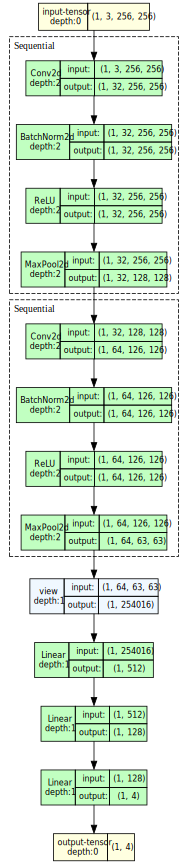

In [1]:
# from torchviz import make_dot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch
import torch.nn as nn
import torchvision
from torchview import draw_graph
from model_CNN import Net
# import 

net = Net()

model_graph = draw_graph(net, input_size=((1,3,256,256)), expand_nested=True)
model_graph.visual_graph

In [ ]:
from model_ANN import ANN
from model_CNNM import Net
from torchview import draw_graph
import graphviz


model = ANN(8)
# model = Net()

model_graph = draw_graph(model, input_size=((1,8)), expand_nested=True)

# model_graph = draw_graph(model, input_size=((1,3,255,255),(1,3,255,255)), expand_nested=True)
model_graph.visual_graph
# graphviz.set_jupyter_format('png')

# Data process

In [3]:
import torch.optim as optim
# from model_CNN import Net
import torch.nn as nn
import pandas as pd
import numpy as np
import torch
import cv2
from sklearn import preprocessing
from tqdm import tqdm

PATH = '/content/drive/MyDrive/data_map/move_model_new_2.pt'

path_csv = "D:/User/data_map/locals.csv"
path_save_l = "D:/User/data_map/left/"
path_save_r = "D:/User/data_map/right/"

df = pd.read_csv(path_csv)
data_y = df['action']

# X = np.array(df['deceduti']).reshape(-1,1)
chuyenDoi = preprocessing.LabelEncoder()
chuyenDoi.fit(data_y)
data_y = chuyenDoi.transform(data_y)


df = np.array(df)

data_X = []
print(data_y)
for i in tqdm(range(len(df))):
    row_data = []
    # print(data)
    image1 = cv2.imread(path_save_l+df[i][0])
    image2 = cv2.imread(path_save_r+df[i][1])

    image1 = cv2.resize(image1, [128,256])
    image2 = cv2.resize(image2, [128,256])

    image_mix = cv2.hconcat([image1,image2])
    cv2.imshow("im", image_mix)
    cv2.waitKey(1)
    row_data.append(image_mix.transpose([2,0,1]))
    # row_data.append(image2.transpose([2,0,1]))

    data_X.append(row_data)
cv2.destroyAllWindows()
with open('D:/User/data_map/category.npy', 'wb') as f:
    np.save(f, np.array(data_X, dtype=np.uint8))
with open('D:/User/data_map/labels.npy', 'wb') as f:
    np.save(f, np.array(data_y,dtype=np.uint8))

# print(np.array(data_X).shape)
# print(data_X)

[1 1 3 ... 0 0 0]


100%|██████████| 1902/1902 [01:19<00:00, 23.84it/s]


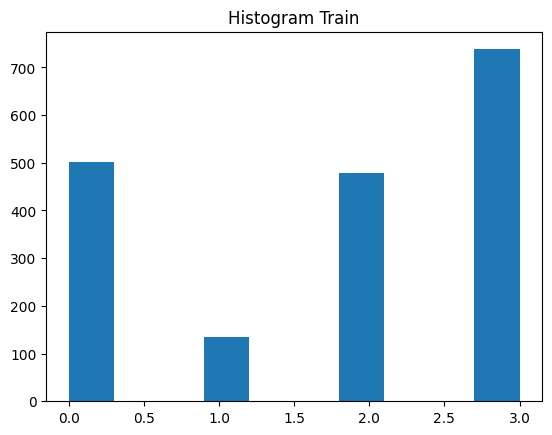

In [2]:
import matplotlib.pyplot as plt

plt.hist(data_y)
plt.title("Histogram Train")
plt.show()
# plt.hist(Val_y)
# plt.title("Histogram Val")
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.interpolate import interp1d

# # Define x, y, and xnew to resample at.
# x = np.linspace(0, 10, num=11, endpoint=True)
# y = np.cos(-x**2/9.0)
# xnew = np.linspace(0, 10, num=41, endpoint=True)

# # Define interpolators.
# f_linear = interp1d(x, y)
# f_cubic = interp1d(x, y, kind='cubic')

# # Plot.
# plt.plot(x, y, 'o', label='data')
# plt.plot(xnew, f_linear(xnew), '-', label='linear')
# plt.plot(xnew, f_cubic(xnew), '--', label='cubic')
# plt.legend(loc='best')
# plt.show()

# Phương trình tay máy

In [ ]:
import numpy as np
a_s = [0, 45, 107]


a_r0 = (a_s[0]*np.pi)/180
a_r1 = (a_s[1] *np.pi)/180
a_r2 = (a_s[2]*np.pi)/180
print("input :", a_r0, a_r1, a_r2)
q1 = a_r0
q2 = a_r1
q3 = a_r2
L0 = 7.5
L1 = 8
L2 = 11.5



x = L1*np.cos(q2)*np.cos(q1) + L2*np.cos(q3-q2)*np.cos(q1)
y = L1*np.cos(q2)*np.sin(q1) + L2*np.cos(q3-q2)*np.sin(q1)
z = L1*np.sin(q2) - L2*np.sin(q3-q2) + L0

print(x, y, z)


In [ ]:
x, y, z = 12, 2, 3
# x 4 - 13
# y = 4 - 10
# z = 0 - 5

a_1 = np.arctan(y/x)

n = z-L0
m = x*np.cos(a_1) + y*np.sin(a_1)

a_3 = np.arccos((np.power(m,2) + np.power(n,2) - np.power(L1,2) - np.power(L2,2))/(2*L1*L2))

u = L1 + L2*np.cos(a_3)
v = L2 * np.sin(a_3)

a_2 = np.arccos((u*m-v*n)/(u**2 + v**2))

a_r0 = np.pi/2 - a_1
a_r1 = a_2 
a_r2 = a_3 - a_2

print(a_r0*180/np.pi, a_r1*180/np.pi, a_r2*180/np.pi)

In [7]:
import cv2

def center_box(box):
    x, y = box[0]+(box[2] - box[0])//2, box[1]+(box[3] - box[1])//2
    w, h = (box[2] - box[0]), (box[3] - box[1])
    return x, y, w, h

def draw_number(boxes1, boxes2, image1, image2):
    x_1, y_1, w_1, h_1 = center_box(boxes1[0])
    x_2, y_2, w_2, h_2 = center_box(boxes2[0])

    cv2.circle(image1, (x_1, y_1), 1, (255,0,0), 1,1)
    cv2.circle(image2, (x_2, y_2), 1, (255,0,0), 1,1)

    cv2.putText(image1, "W :{}, H: {}".format(str(w_1), str(h_1)), (10,10), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0),0, cv2.LINE_AA)
    cv2.putText(image2, "W :{}, H: {}".format(str(w_2), str(h_2)), (10,10), 1, 1, (255,0,0),1, cv2.LINE_AA)


In [8]:
frame = cv2.imread("D:/User/firmware/Screen/hinh-anh-mat-cuoi2-1.png")
frame2 = frame
draw_number([[20,5, 2, 0]],[[30,5, 5, 10]],frame, frame2)
cv2.imshow("image", frame)
cv2.imshow("image1", frame2)

cv2.waitKey(0)